In [52]:
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.optimizers import Adam
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
import os
import json
import csv
import pandas as pd
import sklearn.feature_extraction.text as tfidf
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model, preprocessing,utils
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import zscore
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import f1_score
import collections
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.optimizers import Adam
from keras import optimizers
from keras.layers import Conv1D, Conv2D, MaxPooling2D

In [53]:
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [54]:
import numpy as np

def to_sequences(seq_size, data,close):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        window = data[i:(i+seq_size)]
        after_window = close[i+seq_size]
        window = [[x] for x in window]
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [55]:
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)


In [56]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import keras

In [57]:
df = pd.read_csv("Stock_Price_MAX.csv")

In [58]:
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


In [59]:
df.drop('Date', axis=1, inplace=True)

In [60]:
df.drop('Adj_Close', axis=1, inplace=True)

In [61]:
df.head()

,Open,High,Low,Close,Volume
0,3.812500,4.156250,3.812500,4.125000,3675600
1,4.125000,4.125000,4.000000,4.015625,1077600
2,4.000000,4.031250,3.953125,4.000000,437200
3,4.000000,4.000000,3.843750,3.843750,1883600
4,3.734375,3.734375,3.390625,3.390625,7931600


In [62]:
df_close = df['Close']

In [63]:
#ZScore for Numeric columns
def Z_score(column):
    df[column] = zscore(df[column])

In [64]:
num_col_zscore = ['Open','High','Low','Close','Volume']
for i in num_col_zscore:
    Z_score(i)

In [65]:
df.head()

,Open,High,Low,Close,Volume
0,-0.894311,-0.885122,-0.892408,-0.884464,1.104938
1,-0.883863,-0.886157,-0.886076,-0.888122,-0.497357
2,-0.888042,-0.889261,-0.887659,-0.888645,-0.892319
3,-0.888042,-0.890295,-0.891353,-0.893870,-0.000263
4,-0.896922,-0.899088,-0.906655,-0.909023,3.729791


In [66]:
output_array = df_close.values

input_df = df
input_array = input_df.values

In [67]:
x_train,x_test,y_train,y_test = train_test_split(input_array,output_array,test_size=0.3,shuffle=False)

In [68]:
for i in range(5):
    model = Sequential()
    model.add(Dense(25, input_dim=input_array.shape[1], activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(1,activation='relu'))

    # show not only log loss but also accuracy for each epoch using metrics=['accuracy']
    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer='adagrad')
    checkpointer = ModelCheckpoint(filepath="best_weights_reg.hdf5", verbose=0, save_best_only=True) # save best model
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto') 
    model.fit(x_train, y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=10)

Train on 3074 samples, validate on 1318 samples
Epoch 1/10
 - 2s - loss: 0.4150 - val_loss: 2.3696
Epoch 2/10
 - 0s - loss: 0.4128 - val_loss: 2.3696
Epoch 3/10
 - 0s - loss: 0.4128 - val_loss: 2.3696
Epoch 00003: early stopping
Train on 3074 samples, validate on 1318 samples
Epoch 1/10
 - 1s - loss: 0.4118 - val_loss: 7.9585e-04
Epoch 2/10
 - 0s - loss: 0.4001 - val_loss: 9.3948e-04
Epoch 3/10
 - 0s - loss: 0.4002 - val_loss: 8.5752e-04
Epoch 00003: early stopping
Train on 3074 samples, validate on 1318 samples
Epoch 1/10
 - 1s - loss: 0.4008 - val_loss: 0.0635
Epoch 2/10
 - 0s - loss: 0.4001 - val_loss: 0.0369
Epoch 3/10
 - 0s - loss: 0.4001 - val_loss: 0.0409
Epoch 4/10
 - 0s - loss: 0.4005 - val_loss: 0.0339
Epoch 5/10
 - 0s - loss: 0.4001 - val_loss: 0.0296
Epoch 6/10
 - 0s - loss: 0.4001 - val_loss: 0.0311
Epoch 7/10
 - 0s - loss: 0.4001 - val_loss: 0.0270
Epoch 8/10
 - 0s - loss: 0.4001 - val_loss: 0.0290
Epoch 9/10
 - 0s - loss: 0.4001 - val_loss: 0.0300
Epoch 00009: early stop

In [69]:
model.load_weights('best_weights_reg.hdf5') # load weights from best model

In [70]:
pred = model.predict(x_test)
print("Shape: {}".format(pred.shape))
print(pred.shape)

Shape: (1318, 1)
(1318, 1)


In [71]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.08528186409404548


In [72]:
# Check This once again
print('Evaluating with R2 score metric: %.2f' % r2_score(y_test,pred))

Evaluating with R2 score metric: 0.99


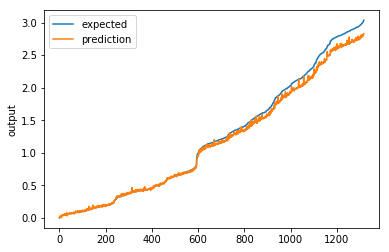

In [73]:
chart_regression(pred.flatten(),y_test,sort=True)

# LSTM Model

In [133]:
LSTM_df = pd.read_csv("Stock_Price_MAX.csv")

In [135]:
LSTM_df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


In [136]:
LSTM_df.shape

(4392, 7)

In [137]:
LSTM_df = LSTM_df.drop(['Date'], axis=1)

In [138]:
LSTM_df = LSTM_df.drop(['Adj_Close'], axis=1)

In [139]:
LSTM_df.shape

(4392, 5)

In [140]:
close_df = LSTM_df['Close']

In [141]:
LSTM_df

,Open,High,Low,Close,Volume
0,3.812500,4.156250,3.812500,4.125000,3675600
1,4.125000,4.125000,4.000000,4.015625,1077600
2,4.000000,4.031250,3.953125,4.000000,437200
3,4.000000,4.000000,3.843750,3.843750,1883600
4,3.734375,3.734375,3.390625,3.390625,7931600
5,3.500000,3.703125,3.437500,3.437500,11486800
6,3.531250,3.578125,3.093750,3.500000,13136800
7,3.468750,3.562500,3.453125,3.484375,6349600
8,3.500000,3.593750,3.468750,3.578125,7181200
9,3.593750,3.812500,3.593750,3.609375,13904800


In [142]:
scaler = MinMaxScaler(feature_range=(0,1))
LSTM_df = scaler.fit_transform(LSTM_df)

In [143]:
#x 70-30
percent_70 = int(len(LSTM_df)* 0.70)
print(percent_70)
percent_30 = len(LSTM_df) - percent_70
print(percent_30)

3074
1318


In [144]:
print(LSTM_df[0:percent_70])
print(len(LSTM_df))

[[0.00437775 0.00646865 0.00693437 0.00740835 0.075401  ]
 [0.00703093 0.00620462 0.00853461 0.0064823  0.01919424]
 [0.00596966 0.00541254 0.00813455 0.00635001 0.00533943]
 ...
 [0.34731738 0.35133992 0.34411539 0.34501735 0.06098801]
 [0.34600138 0.35531089 0.34791329 0.35691304 0.04590435]
 [0.35606226 0.36126734 0.35841085 0.35577004 0.05274954]]
4392


In [151]:
train = LSTM_df[0:percent_70]
test = LSTM_df[percent_70:len(LSTM_df)]
#print(type(train))
#train = train.values
#test = test.values
print(train)
print(test)

close_train = close_df[0:percent_70].values
close_test = close_df[percent_70:len(close_df)].values
print(close_train)
print(close_test)

[[0.00437775 0.00646865 0.00693437 0.00740835 0.075401  ]
 [0.00703093 0.00620462 0.00853461 0.0064823  0.01919424]
 [0.00596966 0.00541254 0.00813455 0.00635001 0.00533943]
 ...
 [0.34731738 0.35133992 0.34411539 0.34501735 0.06098801]
 [0.34600138 0.35531089 0.34791329 0.35691304 0.04590435]
 [0.35606226 0.36126734 0.35841085 0.35577004 0.05274954]]
[[0.35920361 0.38957096 0.36361697 0.38260942 0.17524047]
 [0.38556562 0.38348778 0.38627634 0.38531875 0.05610724]
 [0.38374023 0.39692144 0.38785526 0.39861148 0.06555292]
 ...
 [0.92316384 0.92176368 0.91533671 0.9226992  0.04210747]
 [0.92681462 0.92522774 0.93027227 0.92363047 0.02295866]
 [0.92545622 0.94119605 0.93035763 0.9308272  0.03074929]]
[ 4.125     4.015625  4.       ... 44.       45.404999 45.27    ]
[ 48.439999  48.759998  50.330002 ... 112.230003 112.339996 113.190002]


In [152]:
print(len(train))
print(len(test))
print(type(x_train))

3074
1318
<class 'numpy.ndarray'>


In [153]:
SEQUENCE_SIZE = 7

#print(x_train[0:2])

#print("Shape of x_train: {}".format(x_train.shape))
x_train,y_train = to_sequences(SEQUENCE_SIZE,train,close_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,test,close_test)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (3066, 7, 1, 5)
Shape of x_test: (1310, 7, 1, 5)
Shape of y_train: (3066,)
Shape of y_test: (1310,)


In [154]:
x_train.shape[3]

5

In [155]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],x_train.shape[3]))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[3]))

In [156]:
print(x_train.shape)

(3066, 7, 5)


In [157]:
print(x_train[:1])

[[[0.00437775 0.00646865 0.00693437 0.00740835 0.075401  ]
  [0.00703093 0.00620462 0.00853461 0.0064823  0.01919424]
  [0.00596966 0.00541254 0.00813455 0.00635001 0.00533943]
  [0.00596966 0.00514851 0.00720108 0.00502709 0.03663175]
  [0.00371445 0.00290429 0.00333383 0.00119063 0.16747797]
  [0.00172457 0.00264026 0.00373389 0.0015875  0.24439339]
  [0.00198989 0.00158416 0.00080012 0.00211667 0.28009052]]]


In [161]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.callbacks import EarlyStopping
import numpy as np

print('Build model...')
model = Sequential()

model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(7, 5),activation="relu"))
model.summary()
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="relu"))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')
model.summary()

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 64)                17920     
Total params: 17,920
Trainable params: 17,920
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
_____________________________________________________

In [162]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2, epochs=10)  

Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 6s - loss: 173.8400 - val_loss: 3608.1558
Epoch 2/10
 - 3s - loss: 20.4411 - val_loss: 855.5004
Epoch 3/10
 - 3s - loss: 11.2566 - val_loss: 14.1751
Epoch 4/10
 - 3s - loss: 7.6974 - val_loss: 112.5934
Epoch 5/10
 - 3s - loss: 5.1012 - val_loss: 298.0958
Epoch 6/10
 - 3s - loss: 4.1164 - val_loss: 257.9910
Epoch 7/10
 - 3s - loss: 3.3332 - val_loss: 234.5972
Epoch 8/10
 - 3s - loss: 3.5284 - val_loss: 352.5334
Epoch 00008: early stopping


In [163]:
from sklearn import metrics

pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

Score (RMSE): 18.775872646452886


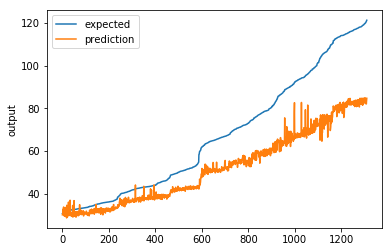

In [164]:
chart_regression(pred.flatten(),y_test,sort=True)

In [165]:
x_train.shape

(3066, 7, 5)

In [166]:
x_train2 = x_train.reshape((3066,1,7,5))

#print(x_train2[:2])
print(x_train2.shape)
print(y_train.shape)

(3066, 1, 7, 5)
(3066,)


# CNN Model

In [167]:
# define a CNN

cnn = Sequential()
cnn.add(Conv2D(64, kernel_size=(1, 3), strides=(1, 1),padding='valid',
                 activation='relu',
                 input_shape=(1,7,5)))

cnn.add(MaxPooling2D(pool_size=(1,2)))
  
    
cnn.add(Flatten())
cnn.add(Dense(30, activation="relu"))

cnn.summary()   
cnn.add(Dense(1, activation="relu"))
cnn.summary()
    
# define optimizer and objective, compile cnn
cnn.compile(loss='mean_squared_error', optimizer='rmsprop')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto') 
checkpointer = ModelCheckpoint(filepath="best_weights_cnn.hdf5", verbose=0, save_best_only=True) # save best model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 5, 64)          1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 30)                3870      
Total params: 4,894
Trainable params: 4,894
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 5, 64)          1024      
_________________________________________________________________
max_pool

In [168]:
cnn.fit(x_train2,y_train,validation_split=0.2,callbacks=[monitor,checkpointer],verbose=2,epochs=10)

Train on 2452 samples, validate on 614 samples
Epoch 1/10
 - 2s - loss: 72.1404 - val_loss: 461.4025
Epoch 2/10
 - 0s - loss: 5.8593 - val_loss: 55.4553
Epoch 3/10
 - 0s - loss: 0.5153 - val_loss: 3.9175
Epoch 4/10
 - 0s - loss: 0.1477 - val_loss: 2.5900
Epoch 5/10
 - 0s - loss: 0.1301 - val_loss: 2.7317
Epoch 6/10
 - 0s - loss: 0.1281 - val_loss: 2.8764
Epoch 00006: early stopping


In [169]:
cnn.load_weights('best_weights_cnn.hdf5') # load weights from best model

In [170]:
x_test = x_test.reshape((-1,1,7,5))
print(x_test.shape)

(1310, 1, 7, 5)


In [171]:
pred = cnn.predict(x_test)
#pred = np.argmax(pred,axis=1)
print("Shape: {}".format(pred.shape))
print(pred[0])

Shape: (1310, 1)
[49.114033]


In [172]:
pred=pred.reshape((-1,1))
print(pred.shape)

(1310, 1)


In [173]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(y_test,pred))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 3.777422676940112


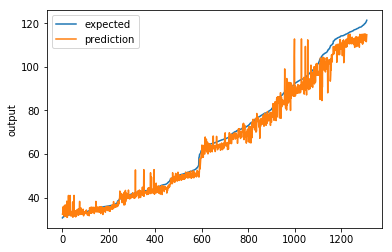

In [174]:
chart_regression(pred.flatten(),y_test,sort=True)